In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import json

import imageio
import os

from PIL import Image, ImageDraw
import glob
import sys

sys.path.insert(1, os.path.join(sys.path[0], '../src/'))

from enr.misc.utils import open_runs
from enr.misc.viz import plot_run, make_gif

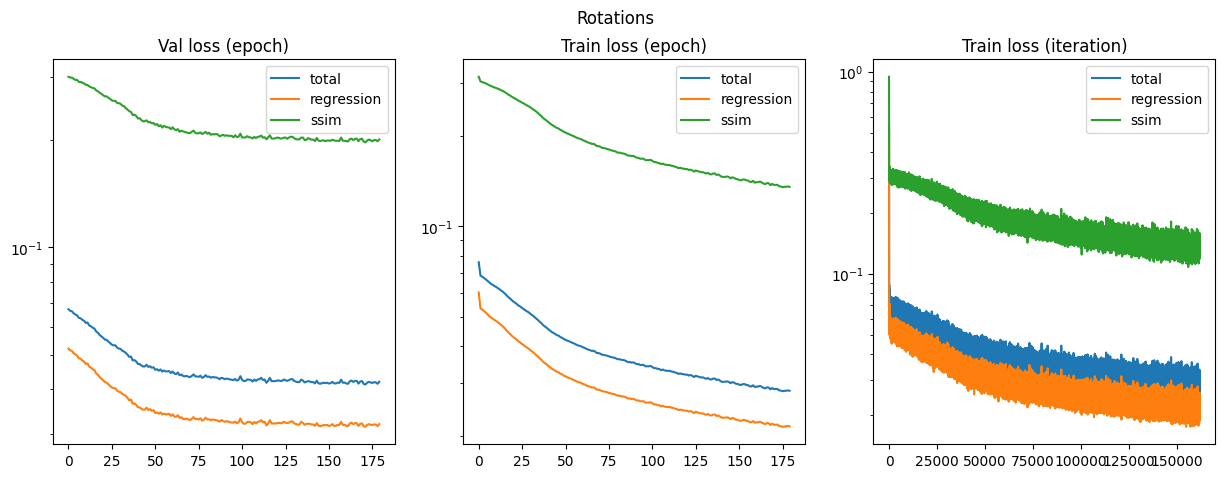

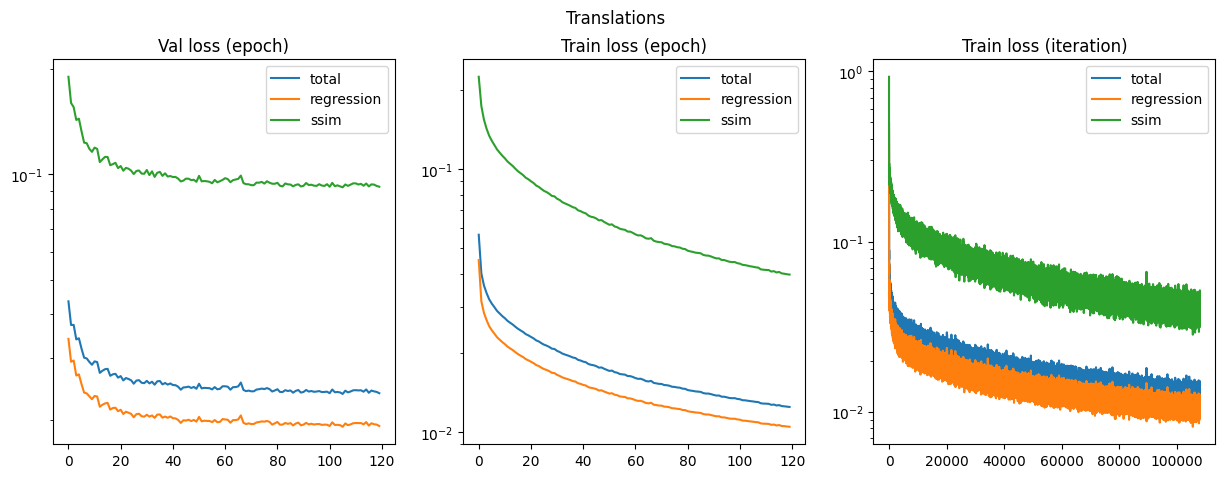

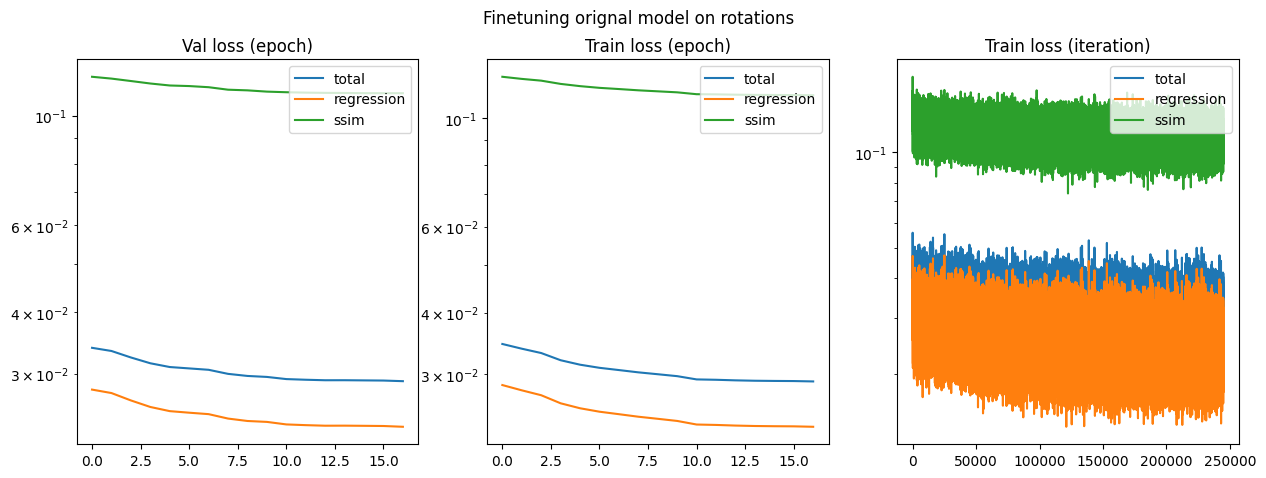

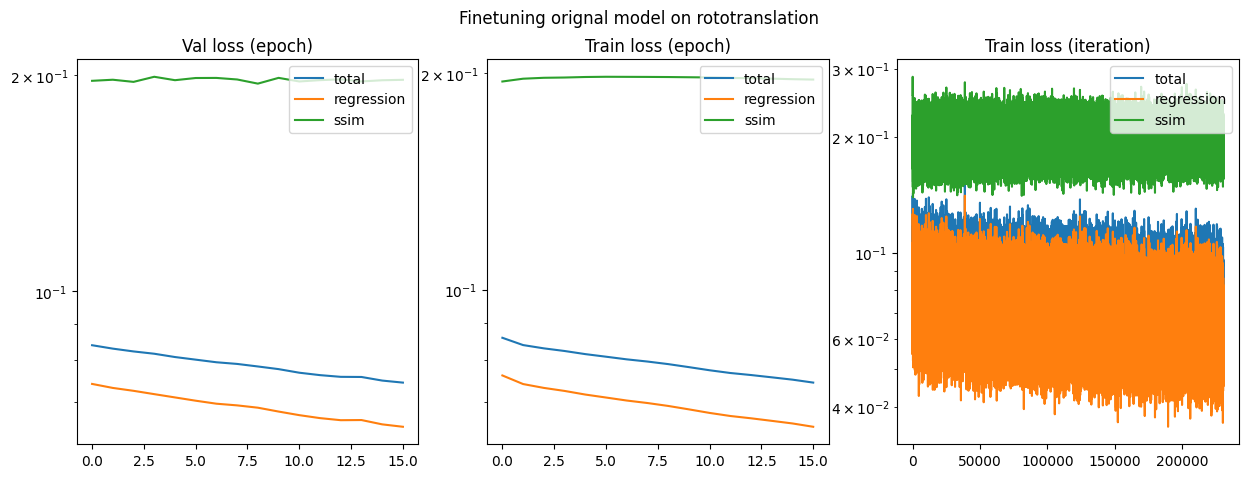

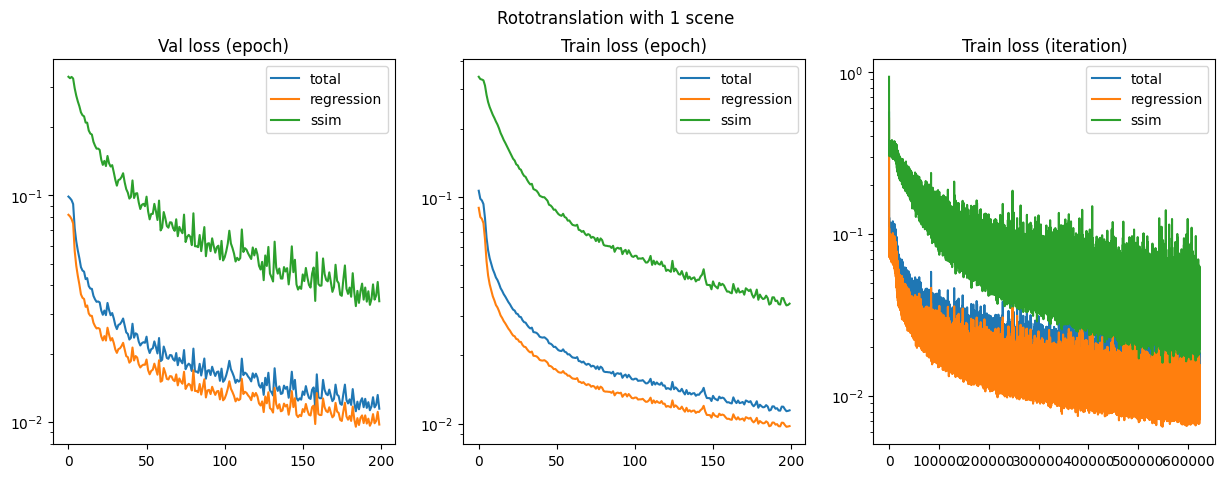

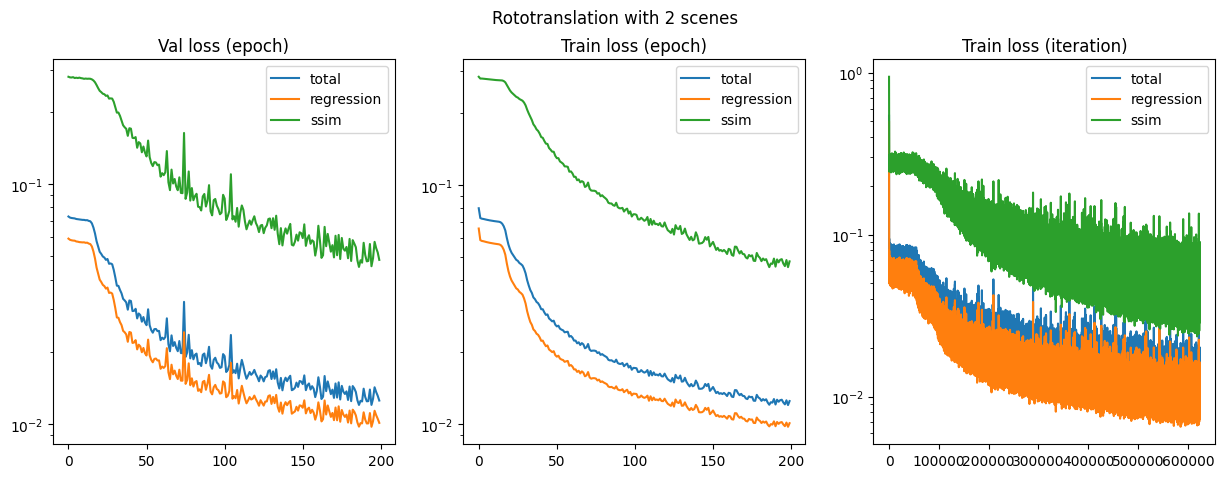

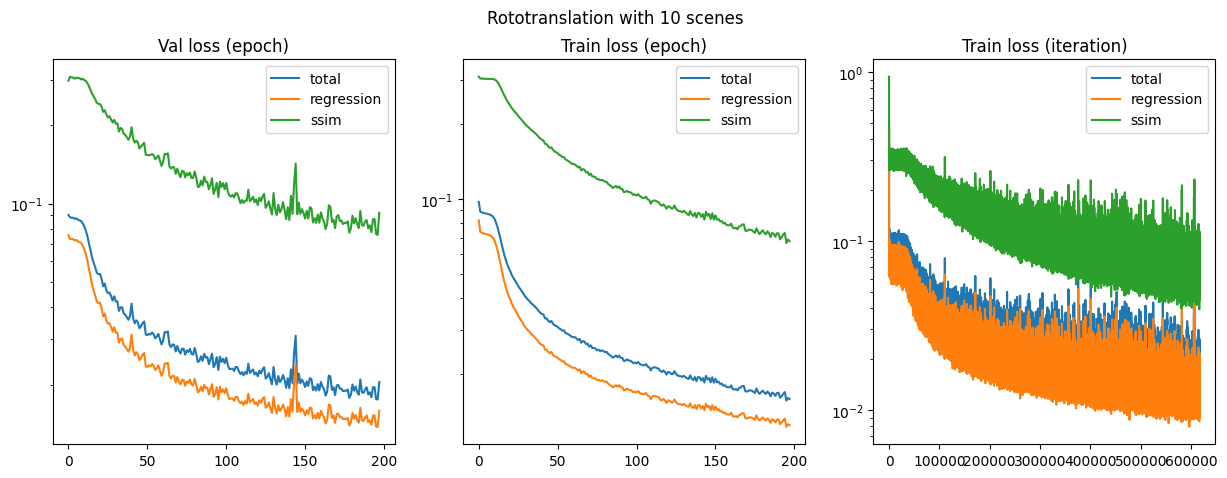

In [2]:
runs = open_runs({
    '2023-05-10_12-31_roto_lr2e-4':                 {'desc': 'Rotations'},
    '2023-05-14_16-54_trans_lr2e-4':                {'desc': 'Translations'},
    '2023-05-21_12-00_roto_finetune_lr1e-5':        {'desc': 'Finetuning orignal model on rotations'},
    '2023-05-22_15-00_rototrans_finetune_lr1e-5':   {'desc': 'Finetuning orignal model on rototranslation'},
    '2023-05-25_15-20_one_rototrans_lr2e-5_64':     {'desc': 'Rototranslation with 1 scene'},
    '2023-05-24_20-01_two_rototrans_lr2e-5_64':     {'desc': 'Rototranslation with 2 scenes'},
    '2023-05-25_14-41_ten_rototrans_lr2e-5_64':     {'desc': 'Rototranslation with 10 scenes'}
})


[plot_run(losses) for losses in runs.values()];

